In [2]:
import pandas as pd
data = pd.read_csv("asm2_data.csv")

data

,ResultID,Date,ProductID,StoreID,Quantity Ordered,Price Each,Address,City
0,1,01/01/23,101.0,ST01,1.0,700.00,123 Main Street,NYC
1,2,01/02/23,102.0,ST02,1.0,14.95,456 Elm Avenue,LA
2,3,01/03/23,103.0,ST03,2.0,11.99,789 Oak Boulevard,Chicago
3,4,01/04/23,104.0,ST04,1.0,149.99,1000 Pine Drive,Houston
4,5,01/05/23,105.0,ST05,1.0,11.99,123 Maple Street,Phoenix
...,...,...,...,...,...,...,...,...
366,333,12/27/23,128.0,ST13,1.0,11.95,123 Maple Street,Denver
367,334,12/28/23,NaN,ST14,3.0,2.99,456 Oak Avenue,Columbus
368,335,12/29/23,127.0,ST15,1.0,11.99,789 Elm Boulevard,Fort Worth
369,336,12/30/23,128.0,ST01,1.0,2.99,1000 Pine Drive,Charlotte


In [3]:
#Lam sach du lieu
data.dropna(inplace=True)
# Duplicate
# Replace
data.isnull().sum()

,0
ResultID,0
Date,0
ProductID,0
StoreID,0
Quantity Ordered,0
Price Each,0
Address,0
City,0


In [4]:
# Phan tich du lieu
quantities = data["Quantity Ordered"]
quantities.sum()
quantities.mean()

prices = data["Price Each"]
prices.mean()
prices.median()

# Them moi cot du lieu
data["Sale"] = data["Price Each"] * data["Quantity Ordered"]
data.describe()

,ResultID,ProductID,Quantity Ordered,Price Each,Sale
count,327.000000,327.000000,327.000000,327.000000,327.000000
mean,174.446483,120.721713,1.119266,154.289358,154.885076
std,95.873044,12.263677,0.430254,255.259423,254.926290
min,1.000000,101.000000,1.000000,2.990000,2.990000
25%,95.500000,109.000000,1.000000,11.950000,11.950000
50%,175.000000,123.000000,1.000000,14.950000,14.950000
75%,249.500000,128.000000,1.000000,150.000000,150.000000
max,337.000000,150.000000,5.000000,1700.000000,1700.000000


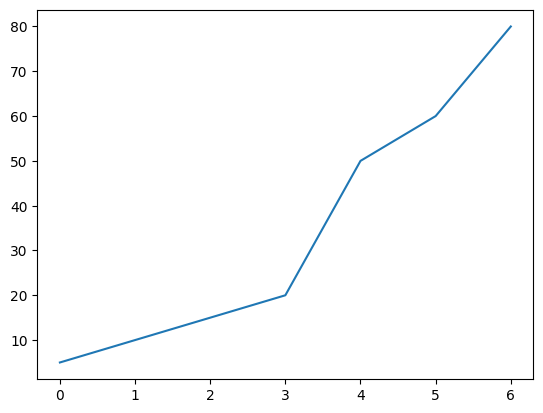

In [5]:
# Truc quan hoa
# matplotlib - matlab
import matplotlib.pyplot as plt

y = [5, 10, 15, 20, 50, 60, 80]
plt.plot(y)
plt.show()

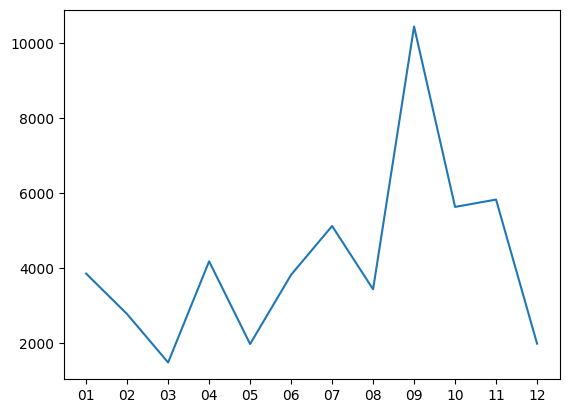

In [6]:
# Cau hoi:
# Doanh so ban hang cac thang trong nam
# Thang nao co doanh so cao nhat
data["Month"] = data["Date"].str[0:2]
# data
sales = data.groupby("Month").sum()["Sale"]

sales
months = sales.index
months
plt.plot(months, sales)
# plt.xlabel("Average Pulse")
# plt.ylabel("Calorie Burnage")
plt.show()

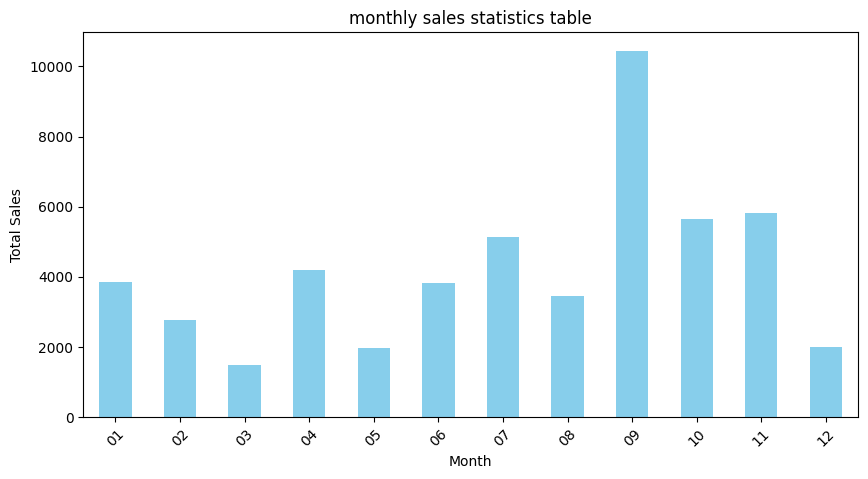

In [9]:
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
data["Month"] = data["Date"].str[0:2]
sales = data.groupby("Month").sum()["Sale"]
plt.figure(figsize=(10, 5))
sales.plot(kind='bar', color='skyblue')
plt.title('monthly sales statistics table')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

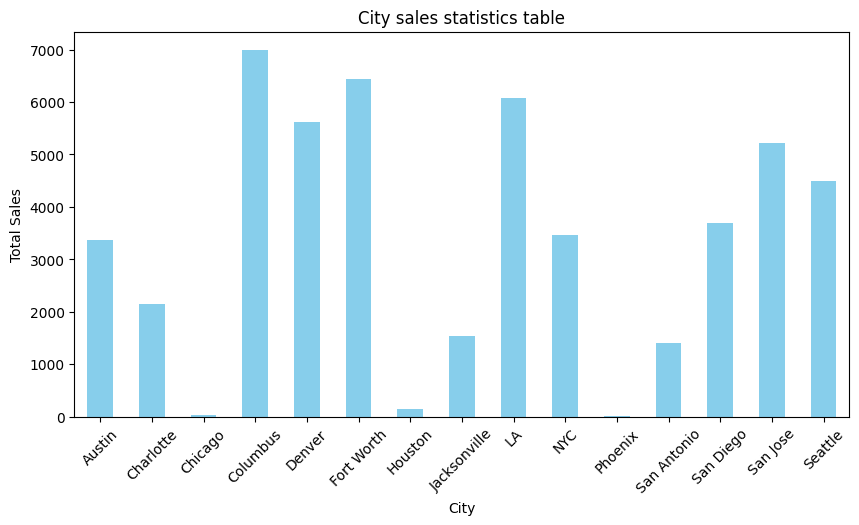

In [12]:
df = pd.DataFrame(data)
city_sales = data.groupby("City").sum()["Sale"]
plt.figure(figsize=(10, 5))
city_sales.plot(kind='bar', color='skyblue')
plt.title('City sales statistics table')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [14]:
best_city = city_sales.idxmax()
best_city =city_sales.max()
print(f'The best city for sales is {best_city} with total sales of ${best_city_sales}.')

The best city for sales is 6996.06 with total sales of $6996.06.


Text(0, 0.5, 'Total Sales')

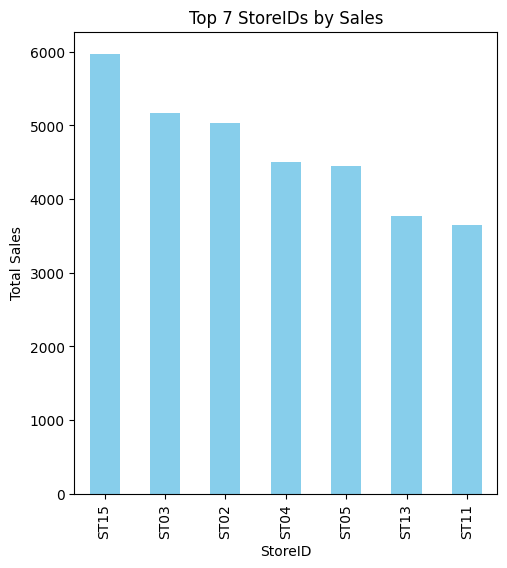

In [21]:

N = 7
store_sales= df.groupby('StoreID')['Sale'].sum()
top_n_stores = store_sales.nlargest (N)
bottom_n_stores=store_sales.nsmallest (N)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_n_stores.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} StoreIDs by Sales')
plt.xlabel('StoreID')
plt.ylabel('Total Sales')

In [22]:
df_unique = df.drop_duplicates()
df_unique

,ResultID,Date,ProductID,StoreID,Quantity Ordered,Price Each,Address,City,Sale,Month
0,1,01/01/23,101.0,ST01,1.0,700.00,123 Main Street,NYC,700.00,01
1,2,01/02/23,102.0,ST02,1.0,14.95,456 Elm Avenue,LA,14.95,01
2,3,01/03/23,103.0,ST03,2.0,11.99,789 Oak Boulevard,Chicago,23.98,01
3,4,01/04/23,104.0,ST04,1.0,149.99,1000 Pine Drive,Houston,149.99,01
4,5,01/05/23,105.0,ST05,1.0,11.99,123 Maple Street,Phoenix,11.99,01
...,...,...,...,...,...,...,...,...,...,...
360,332,12/26/23,128.0,ST12,1.0,149.99,123 Main Street,Seattle,149.99,12
361,333,12/27/23,128.0,ST13,1.0,11.95,123 Maple Street,Denver,11.95,12
363,335,12/29/23,127.0,ST15,1.0,11.99,789 Elm Boulevard,Fort Worth,11.99,12
364,336,12/30/23,128.0,ST01,1.0,2.99,1000 Pine Drive,Charlotte,2.99,12


Text(0, 0.5, 'Total Sales')

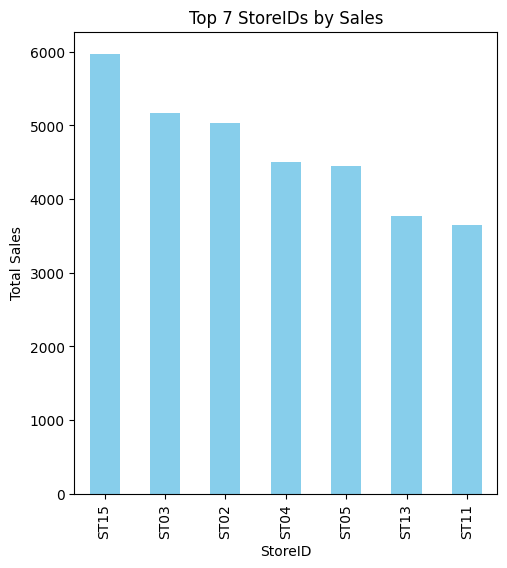

In [24]:
N = 7
store_sales= df.groupby('StoreID')['Sale'].sum()
top_n_stores = store_sales.nlargest (N)
bottom_n_stores=store_sales.nsmallest (N)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_n_stores.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} StoreIDs by Sales')
plt.xlabel('StoreID')
plt.ylabel('Total Sales')

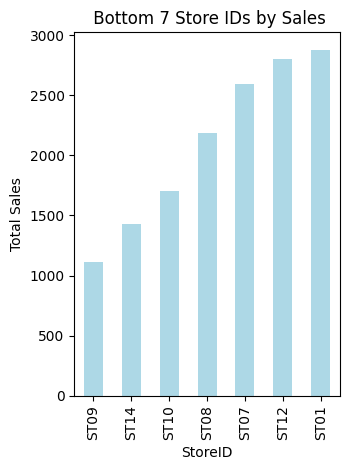

In [25]:

plt.subplot(1, 2, 2)
bottom_n_stores.plot(kind='bar', color='lightblue')
plt.title(f' Bottom {N} Store IDs by Sales')
plt.xlabel('StoreID')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [26]:
plt.pie(city_value_sales, labels = City, autopct='%.4f')
plt.title('Top 4 City highest by Sales')
plt.show()

NameError: name 'city_value_sales' is not defined

ValueError: x must be 1D

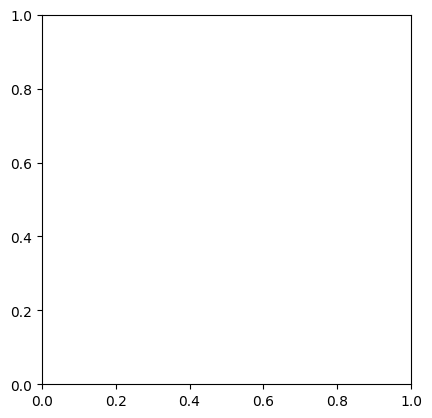

In [32]:
plt.pie(city_month_sales, labels = city, autopct='%.4f')
plt.title('Top 4 City highest by Sales')
plt.show()

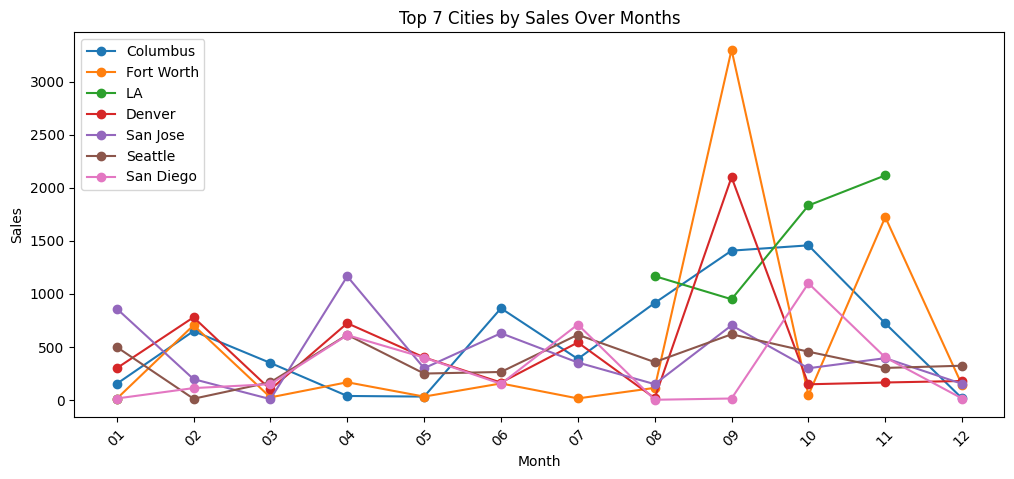

In [27]:

N = 7
city_month_sales= df.groupby(['City', 'Month'])['Sale'].sum().unstack()
city_total_sales = city_month_sales.sum(axis=1)
top_n_cities = city_total_sales.nlargest (N)
plt.figure(figsize=(12, 5))
for city in top_n_cities.index:
    plt.plot(city_month_sales.columns, city_month_sales.loc[city], marker='o', label=city)
plt.title(f'Top {N} Cities by Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [23]:
df_cleaned=df.dropna()
df_cleaned

,ResultID,Date,ProductID,StoreID,Quantity Ordered,Price Each,Address,City,Sale,Month
0,1,01/01/23,101.0,ST01,1.0,700.00,123 Main Street,NYC,700.00,01
1,2,01/02/23,102.0,ST02,1.0,14.95,456 Elm Avenue,LA,14.95,01
2,3,01/03/23,103.0,ST03,2.0,11.99,789 Oak Boulevard,Chicago,23.98,01
3,4,01/04/23,104.0,ST04,1.0,149.99,1000 Pine Drive,Houston,149.99,01
4,5,01/05/23,105.0,ST05,1.0,11.99,123 Maple Street,Phoenix,11.99,01
...,...,...,...,...,...,...,...,...,...,...
365,337,12/31/23,128.0,ST02,2.0,2.99,123 Main Street,Seattle,5.98,12
366,333,12/27/23,128.0,ST13,1.0,11.95,123 Maple Street,Denver,11.95,12
368,335,12/29/23,127.0,ST15,1.0,11.99,789 Elm Boulevard,Fort Worth,11.99,12
369,336,12/30/23,128.0,ST01,1.0,2.99,1000 Pine Drive,Charlotte,2.99,12


In [10]:
best_month = sales.idxmax()
best_month_sales =sales.max()
print(f'The best month for sales is {best_month} with total sales of ${best_month_sales}.')

The best month for sales is 09 with total sales of $10450.17.
